In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

Dataset for homework - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

For homework, we will use only 6 most important features. That would be sufficient.

In [10]:
df = pd.read_csv('creditcard.csv').drop(['Time'], axis=1)

In [11]:
df.drop_duplicates().Class.value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [12]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [14]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Feature importances

   feature  importance
0      V10    0.154878
1      V14    0.139212
2       V4    0.128520
3      V12    0.102423
4      V11    0.086528
5      V17    0.072954
6       V3    0.053497
7       V7    0.046580
8      V16    0.038120
9       V2    0.019010
10     V21    0.018967
11      V9    0.011698
12     V19    0.010332
13  Amount    0.009723
14     V28    0.009673
15     V18    0.009441
16     V20    0.009232
17      V6    0.008338
18     V26    0.007842
19     V13    0.007763
20     V27    0.007577
21      V5    0.007114
22     V15    0.006928
23      V8    0.006706
24     V25    0.006018
25     V22    0.005761
26      V1    0.005493
27     V24    0.005227
28     V23    0.004444


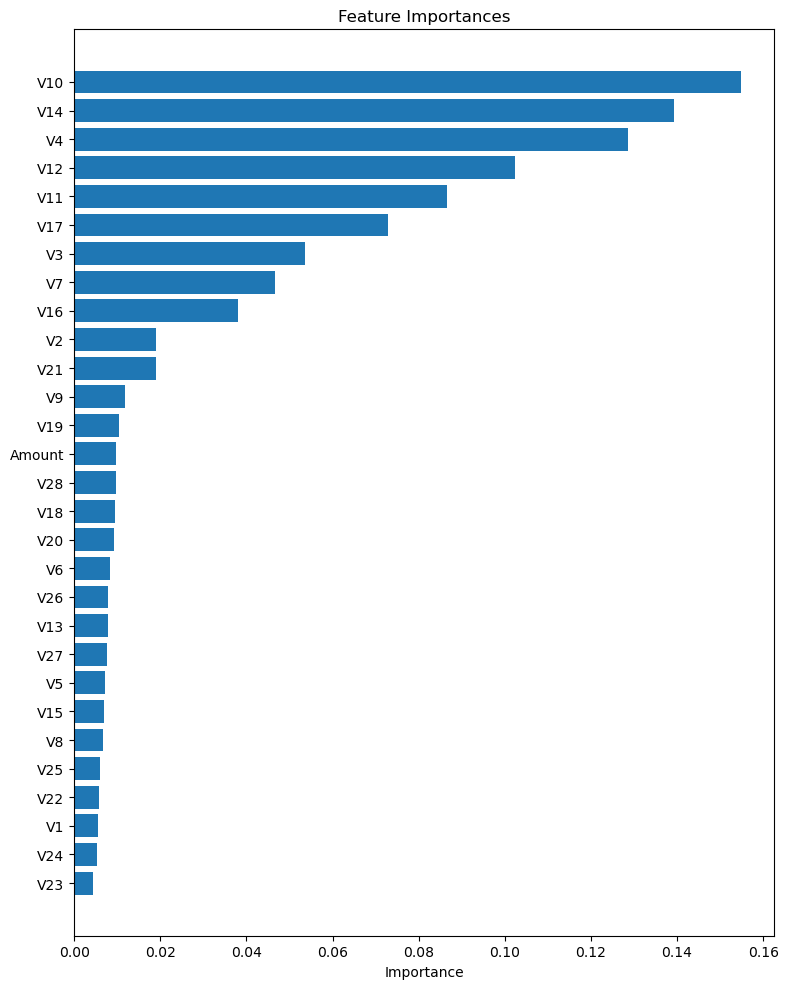

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

clf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'
)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)

print(feat_imp)

plt.figure(figsize=(8, 10))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [16]:
features = ['V10','V14','V4','V12', 'V11', 'V17', 'Class']

In [17]:
df = df[features].copy(deep=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V10     284807 non-null  float64
 1   V14     284807 non-null  float64
 2   V4      284807 non-null  float64
 3   V12     284807 non-null  float64
 4   V11     284807 non-null  float64
 5   V17     284807 non-null  float64
 6   Class   284807 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 15.2 MB


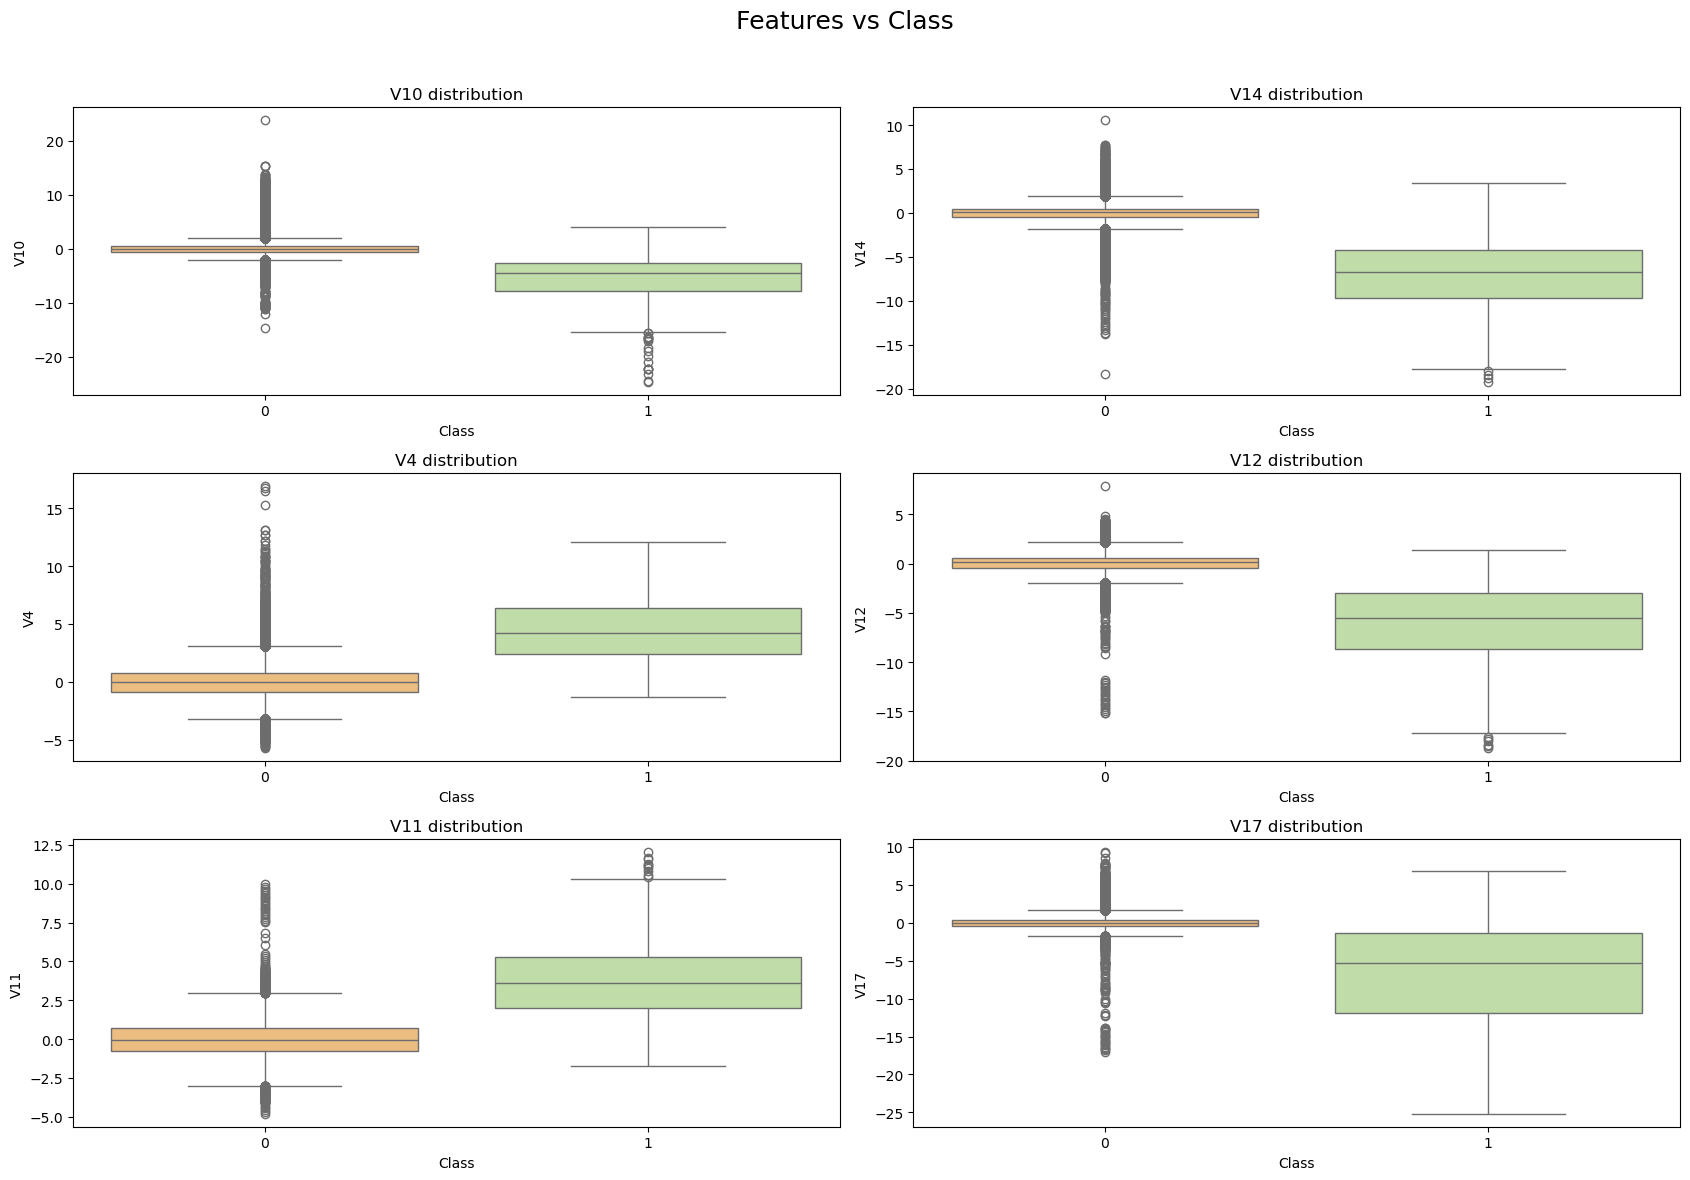

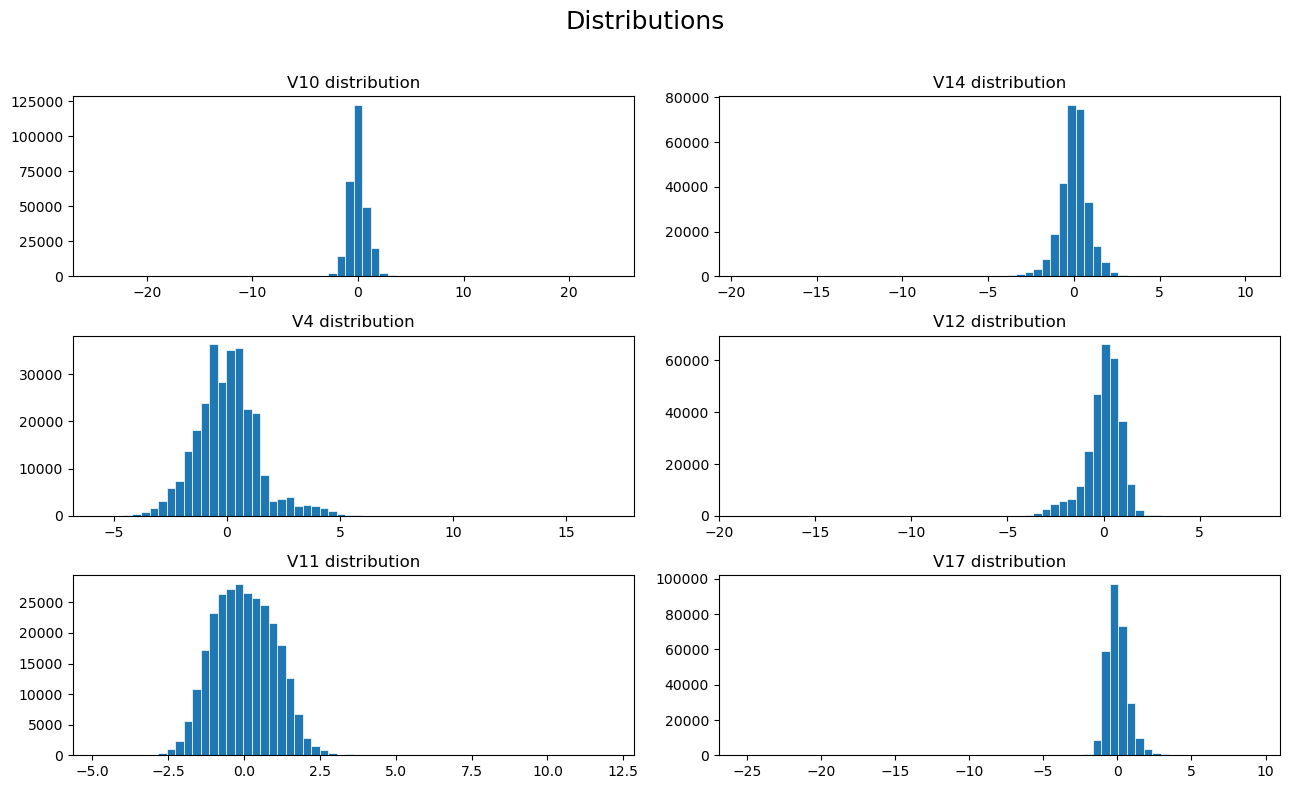

In [19]:
fig, axes = plt.subplots(3,2, figsize=(17, 12))
fig.suptitle('Features vs Class', size=18)

for ax, feat in zip(axes.flatten(), features):
    sns.boxplot(
        ax=ax,
        data=df,
        x='Class',
        y=feat,
        hue='Class',
        palette='Spectral',
        dodge=False
    )
    ax.set_title(f"{feat} distribution")
    ax.get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.96])

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 8))
fig.suptitle('Distributions\n', size=18)

for ax, feat in zip(axes.flatten(), features):
    ax.hist(df[feat], bins=60, linewidth=0.5, edgecolor='white')
    ax.set_title(f"{feat} distribution")

plt.tight_layout()

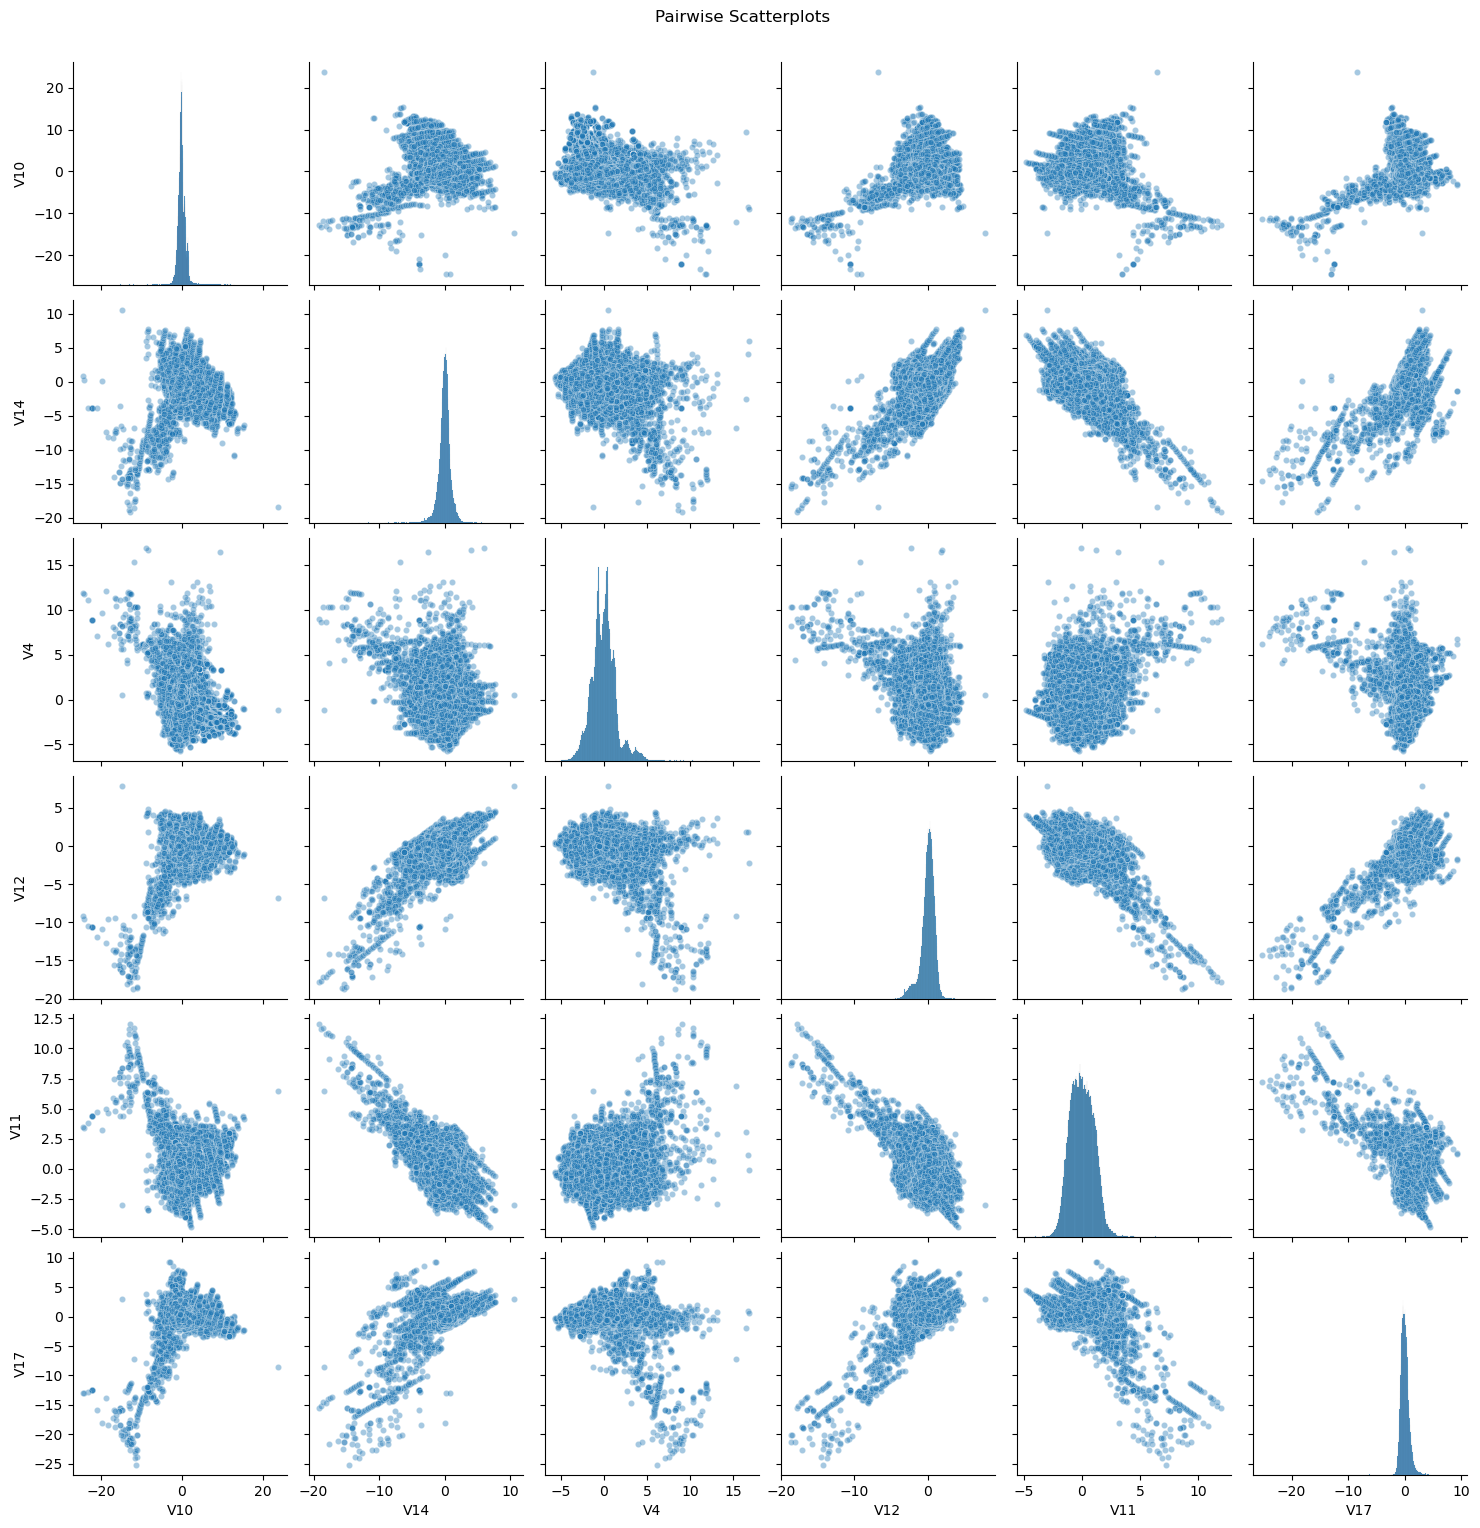

In [20]:
features = ['V10','V14','V4','V12', 'V11','V17']

sns.pairplot(df[features], diag_kind='hist', plot_kws={'alpha':0.4, 's':20})
plt.suptitle('Pairwise Scatterplots', y=1.02)
plt.show()

In [21]:
def IQR_method(df,n,features, k=1.5):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = k * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Detect anomalies via IQR method
outlier_indices = IQR_method(df, n=1, features=features, k=4.5)

# # Prepare a plotting DataFrame with an 'anomaly' flag
df_out = df[features].copy()
df_out['anomaly'] = 'normal'
df_out.loc[outlier_indices, 'anomaly'] = 'outlier'

Total number of outliers is: 566


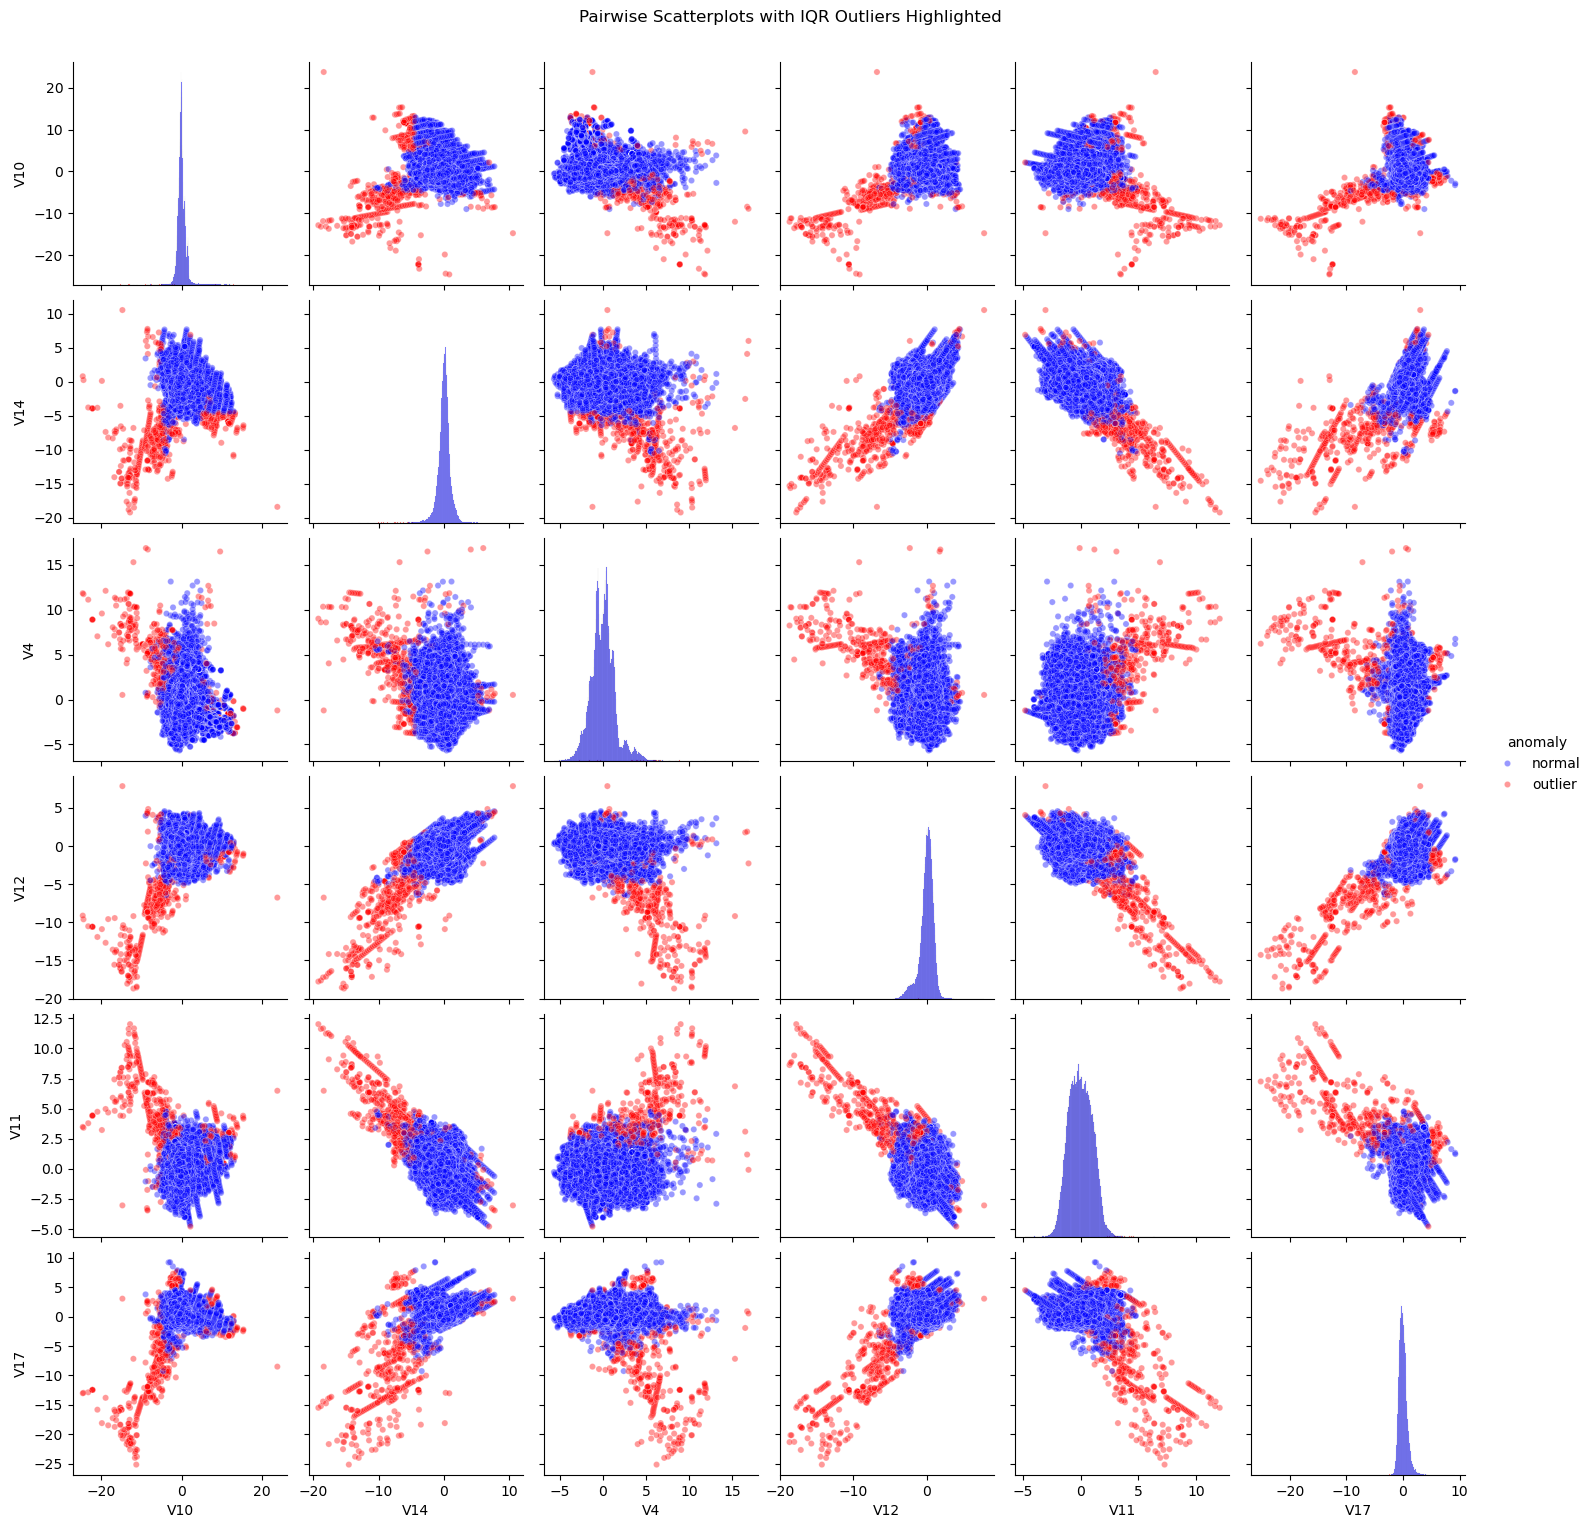

In [23]:
# Pairplot with anomalies highlighted
sns.pairplot(
    df_out,
    vars=features,
    hue='anomaly',
    palette={'normal': 'blue', 'outlier': 'red'},
    diag_kind='hist',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Pairwise Scatterplots with IQR Outliers Highlighted', y=1.02)
plt.show()

In [24]:
df_out

,V10,V14,V4,V12,V11,V17,anomaly
0,0.090794,-0.311169,1.378155,-0.617801,-0.551600,0.207971,normal
1,-0.166974,-0.143772,0.448154,1.065235,1.612727,-0.114805,normal
2,0.207643,-0.165946,0.379780,0.066084,0.624501,1.109969,normal
3,-0.054952,-0.287924,-0.863291,0.178228,-0.226487,-0.684093,normal
4,0.753074,-1.119670,0.403034,0.538196,-0.822843,-0.237033,normal
...,...,...,...,...,...,...,...
284802,4.356170,4.626942,-2.066656,2.711941,-1.593105,1.991691,normal
284803,-0.975926,-0.675143,-0.738589,0.915802,-0.150189,-0.025693,normal
284804,-0.484782,-0.510602,-0.557828,0.063119,0.411614,0.313502,normal
284805,-0.399126,0.449624,0.689799,-0.962886,-1.933849,0.509928,normal


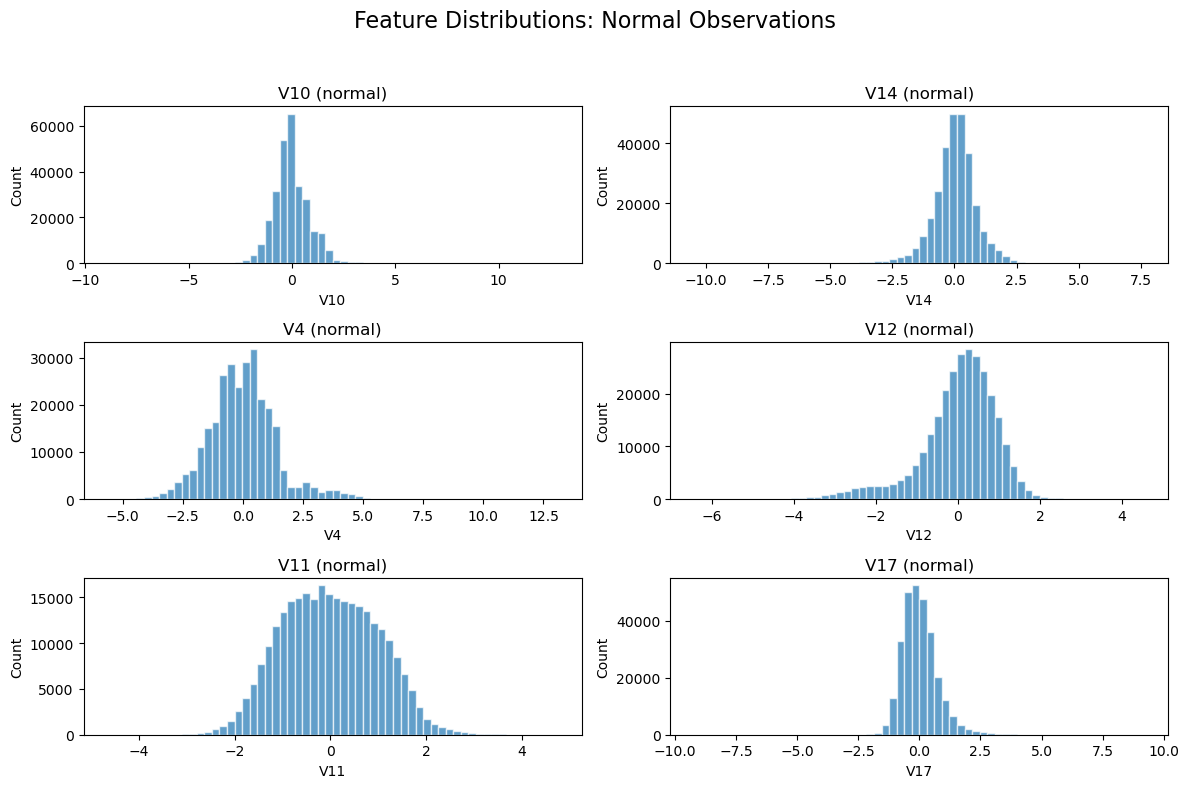

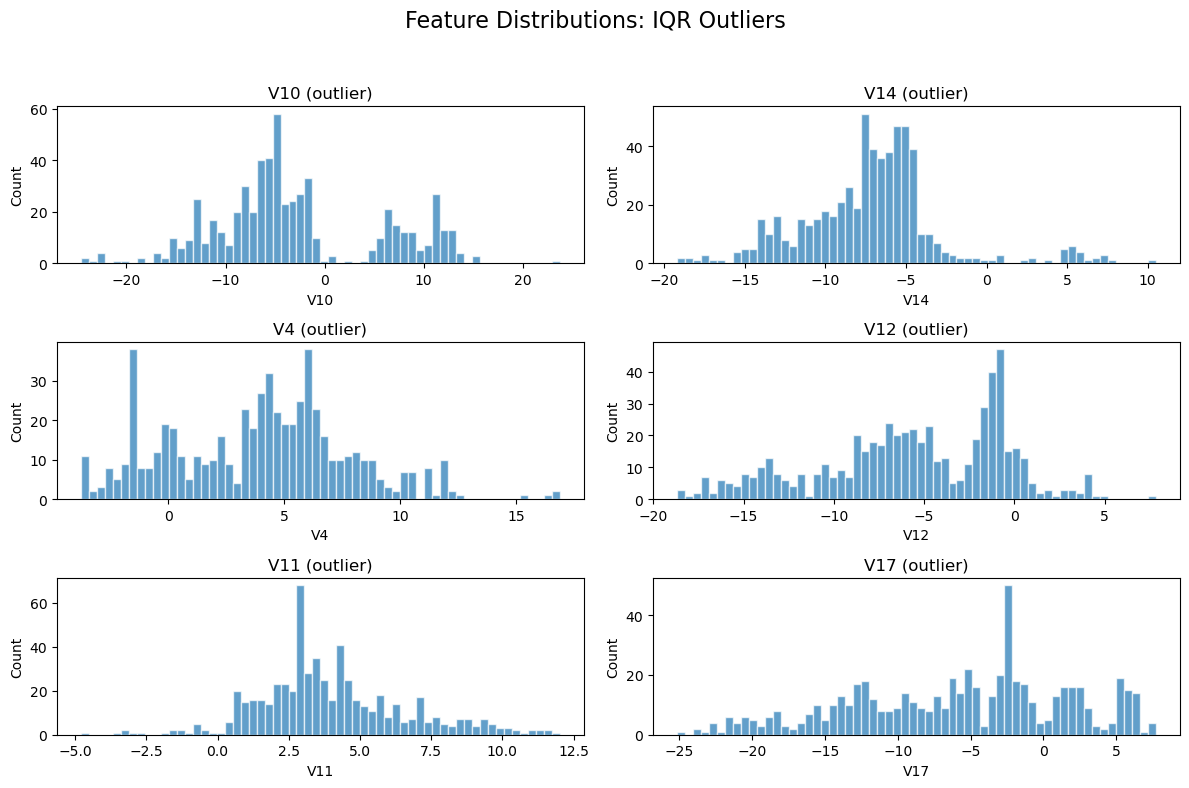

In [25]:
df_norm = df_out[df_out['anomaly'] == 'normal']
df_outlier  = df_out[df_out['anomaly'] == 'outlier']

fig1, axes1 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig1.suptitle('Feature Distributions: Normal Observations', size=16)

for ax, feat in zip(axes1.flatten(), features):
    ax.hist(
        df_norm[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (normal)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


fig2, axes2 = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig2.suptitle('Feature Distributions: IQR Outliers', size=16)

for ax, feat in zip(axes2.flatten(), features):
    ax.hist(
        df_outlier[feat],
        bins=60,
        alpha=0.7,
        edgecolor='white'
    )
    ax.set_title(f"{feat} (outlier)")
    ax.set_xlabel(feat)
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [26]:
# Evaluate how well IQR outliers correspond to actual frauds
# Treat IQR outlier=1 as "predicted fraud", normal=0 as "predicted non‑fraud"
df_out['pred_iqr'] = 0
df_out.loc[outlier_indices, 'pred_iqr'] = 1

y_true = df['Class']
y_pred = df_out['pred_iqr']

print("=== IQR Outlier Detection vs. True Fraud Labels ===")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['non‑fraud','fraud']))

cm = confusion_matrix(y_true, y_pred)
cm_df_out = pd.DataFrame(cm,
                     index=['true_non‑fraud','true_fraud'],
                     columns=['pred_non‑fraud','pred_fraud'])
print("\nConfusion Matrix:")
print(cm_df_out)

=== IQR Outlier Detection vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non‑fraud       1.00      1.00      1.00    284315
       fraud       0.54      0.65      0.59       492

    accuracy                           1.00    284807
   macro avg       0.77      0.83      0.80    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non‑fraud  pred_fraud
true_non‑fraud          284045         270
true_fraud                 171         321


---

### Homework: Although we have managed to catch most of the frauds using a fairly simple IQR method, we still can improve the results. Try to do the same outlier/anomaly detection, but with more powerful methods and evaluate how much the metrics have improved/worsened.
I suggest you test these approaches:
- EllipticEnvelope
- IsolationForest
- LOF
- DBSCAN
- OneClassSVM
- etc.

Compare their results and draw some conclusions based on them.

Універсальна функція для виводу результатів

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def evaluate_model(y_true, y_pred, title="Model"):
    print(f"\n=== {title} vs. True Fraud Labels ===\n")

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=["non-fraud", "fraud"]))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm,
                         index=["true_non-fraud", "true_fraud"],
                         columns=["pred_non-fraud", "pred_fraud"])
    print(cm_df)


In [28]:
# Порахуємо частку класу "1"
fraud_ratio = df['Class'].mean()
print(f"Частка шахрайств: {fraud_ratio:.4%}")

Частка шахрайств: 0.1727%


Тобто тільки приблизно 17% усіх транзакцій -- шахрайські

### EllipticEnvelope

In [29]:
from sklearn.covariance import EllipticEnvelope

# Створюємо модель
model = EllipticEnvelope(contamination=fraud_ratio, random_state=42)  # 0.17% шахрайств

# Навчаємо
model.fit(X)

# Передбачаємо: -1 = аномалія, 1 = норма
y_pred = model.predict(X)

# Перетворюємо на ті ж 0 і 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

evaluate_model(y_true, y_pred, title="Elliptic Envelope")

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-135.429843483652945 > -135.512330193870440). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-209.085460341601276 > -238.983499513768180). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.007852051782066 > -240.577953275708893). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
c:\U


=== Elliptic Envelope vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.17      0.17      0.17       492

    accuracy                           1.00    284807
   macro avg       0.58      0.58      0.58    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283907         408
true_fraud                 408          84


### Result

Elliptic Envelope показав низьку ефективність у виявленні шахрайських транзакцій:

- Модель змогла правильно виявити лише 17% випадків шахрайства (Recall = 0.17), що є недостатнім для задачі, де важливо не пропустити жодного випадку фроду.

Високий рівень хибнопозитивних спрацьовувань:

- Було помилково класифіковано 408 звичайних транзакцій як шахрайські, що може призвести до необґрунтованих блокувань карток клієнтів.

Загальна точність (accuracy) не є інформативною метрикою в умовах дисбалансованих даних:

- Хоча модель досягла загальної точності 1.00, це зумовлено великою кількістю нормальних транзакцій (non-fraud) у наборі даних. Важливіші метрики в даному випадку — Recall та Precision для класу fraud.

Elliptic Envelope не є оптимальним методом для виявлення шахрайства в цьому випадку:

- Через обмеження методу (наприклад, припущення про гаусівський розподіл) та високий дисбаланс класів, цей підхід не забезпечує достатнього рівня виявлення фроду.


### IsolationForest

In [30]:
from sklearn.ensemble import IsolationForest

# Створюємо модель
model = IsolationForest(contamination=fraud_ratio, random_state=42)  # 0.17% шахрайств

# Навчаємо
model.fit(X)

# Передбачаємо: -1 = аномалія, 1 = норма
y_pred = model.predict(X)

# Перетворюємо на ті ж 0 і 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# Оцінюємо модель
evaluate_model(y_true, y_pred, title="Isolation Forest")


=== Isolation Forest vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.28      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283962         353
true_fraud                 353         139


### Result

Isolation Forest показав кращу здатність до виявлення шахрайства порівняно з Elliptic Envelope:

- Модель змогла виявити 139 з 492 шахрайських транзакцій, що дало Recall = 0.28 — вищий, ніж у попереднього методу (0.17).

Покращена точність у виявленні фроду:

- Precision = 0.28, що також є вищим, ніж у Elliptic Envelope, хоча загалом значення все ще залишаються низькими для практичного застосування.

Загальна точність моделі знову висока (1.00), але це оманливо:

- Як і у випадку з Elliptic Envelope, така точність пов’язана з дисбалансом класів у наборі даних (значно більше звичайних транзакцій), тому ключовими метриками залишаються Recall і Precision для шахрайства.

- Модель допустила 353 хибнопозитивних спрацьовування, що менше, ніж у попереднього методу (408), при цьому виявивши більше справжніх фродів. Це свідчить про кращий компроміс між виявленням аномалій та кількістю помилкових тривог.

- Isolation Forest виявляється більш ефективним методом для задачі виявлення аномалій на основі кредитних транзакцій, ніж метод на основі гаусівського припущення (Elliptic Envelope), особливо в умовах високого дисбалансу класів.

### LOF

In [31]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 1  # Кількість сусідів

# Створюємо модель
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% шахрайств

# Навчаємо
model.fit(X)

# Передбачаємо: -1 = аномалія, 1 = норма
y_pred = model.fit_predict(X)

# Перетворюємо на ті ж 0 і 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# Оцінка моделі
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=1) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.01      0.01      0.01       492

    accuracy                           1.00    284807
   macro avg       0.51      0.51      0.51    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283830         485
true_fraud                 485           7


In [34]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 5  # Кількість сусідів

# Створюємо модель
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% шахрайств

# Навчаємо
model.fit(X)

# Передбачаємо: -1 = аномалія, 1 = норма
y_pred = model.fit_predict(X)

# Перетворюємо на ті ж 0 і 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# Оцінка моделі
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=5) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283823         492
true_fraud                 492           0


In [35]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 10  # Кількість сусідів

# Створюємо модель
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% шахрайств

# Навчаємо
model.fit(X)

# Передбачаємо: -1 = аномалія, 1 = норма
y_pred = model.fit_predict(X)

# Перетворюємо на ті ж 0 і 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# Оцінка моделі
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=10) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283829         486
true_fraud                 492           0


In [36]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 15  # Кількість сусідів

# Створюємо модель
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% шахрайств

# Навчаємо
model.fit(X)

# Передбачаємо: -1 = аномалія, 1 = норма
y_pred = model.fit_predict(X)

# Перетворюємо на ті ж 0 і 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# Оцінка моделі
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=15) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283824         491
true_fraud                 492           0


In [37]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 20  # Кількість сусідів

# Створюємо модель
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% шахрайств

# Навчаємо
model.fit(X)

# Передбачаємо: -1 = аномалія, 1 = норма
y_pred = model.fit_predict(X)

# Перетворюємо на ті ж 0 і 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# Оцінка моделі
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=20) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283823         492
true_fraud                 492           0


In [38]:
from sklearn.neighbors import LocalOutlierFactor

k_value = 25  # Кількість сусідів

# Створюємо модель
model = LocalOutlierFactor(n_neighbors=k_value, contamination=fraud_ratio)  # 0.17% шахрайств

# Навчаємо
model.fit(X)

# Передбачаємо: -1 = аномалія, 1 = норма
y_pred = model.fit_predict(X)

# Перетворюємо на ті ж 0 і 1
y_pred = [1 if p == -1 else 0 for p in y_pred]

# Оцінка моделі
evaluate_model(y_true, y_pred, title=f"Local Outlier Factor (n_neighbors={k_value})")


=== Local Outlier Factor (n_neighbors=25) vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.01      0.01      0.01       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          283828         487
true_fraud                 487           5


### Result

Local Outlier Factor загалом не показав ефективності у виявленні шахрайських транзакцій:

- Для більшості значень n_neighbors модель не виявила майже жодної шахрайської транзакції (Recall ≈ 0.00), а в деяких випадках — взагалі 0 з 492.

Лише при n_neighbors = 1 і n_neighbors = 25 спостерігається хоч якась здатність до виявлення фроду:

- Recall = 0.01 (тобто виявлено 7 і 5 фродів відповідно), що є вкрай низьким і недостатнім для реального застосування.

- Водночас кількість хибнопозитивних результатів (false positives) залишалася високою — понад 480 нормальних транзакцій було помилково віднесено до фроду.

Висока точність класифікації (accuracy ≈ 1.00) є оманливою:

- Вона пояснюється значним дисбалансом класів у наборі даних, і не відображає реальної здатності моделі виявляти рідкісні випадки шахрайства.

Висновок щодо параметра n_neighbors:

- Зі збільшенням значення параметра n_neighbors, модель LOF втрачає і без того слабку здатність виявляти фрод.

- Це свідчить про те, що LOF не підходить для даного типу задач (особливо при сильному дисбалансі даних та малій кількості аномалій).

- Загалом, LOF не є придатним методом для виявлення шахрайських транзакцій у цьому наборі даних незалежно від значення параметра n_neighbors.

### DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Масштабуємо дані, бо DBSCAN чутливий до масштабу
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN — без потреби в навчанні, просто fit_predict
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps можна тюнити
y_pred = dbscan.fit_predict(X_scaled)

# DBSCAN повертає: -1 = шум (аномалія), інше — кластер
# Нам треба -1 -> 1 (аномалія), все інше -> 0
y_pred = [1 if p == -1 else 0 for p in y_pred]

# Оцінка
evaluate_model(y_true, y_pred, title="DBSCAN") 


=== DBSCAN vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      0.68      0.81    284315
       fraud       0.01      0.95      0.01       492

    accuracy                           0.68    284807
   macro avg       0.50      0.81      0.41    284807
weighted avg       1.00      0.68      0.81    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          193614       90701
true_fraud                  26         466


### Result

DBSCAN виявив майже всі випадки шахрайства:

- Модель виявила 466 з 492 фродів, що дало дуже високий рівень Recall = 0.95, найвищий серед усіх розглянутих методів.

Однак precision — майже нульовий (0.01):

- DBSCAN позначив як "аномальні" не лише шахрайські транзакції, а ще й близько 90,000 звичайних транзакцій (false positives). Це дуже висока ціна за виявлення фроду.

Загальна точність (accuracy) суттєво знизилась до 0.68:

- Це пов’язано саме з масовими хибнопозитивними спрацьовуваннями. Практичне застосування такої моделі викликало б надмірну кількість помилкових сповіщень/блокувань.

DBSCAN виявився надто "чутливим" до аномалій:

- Попри високу recall, низька precision свідчить про недостатню селективність. Це може бути наслідком невдалого вибору параметрів eps або min_samples, або через те, що метод не масштабується добре до великих і дисбалансованих наборів.

- DBSCAN може бути корисним для сценаріїв, де критично важливо не пропустити жодної аномалії, але потребує додаткової фільтрації, щоб зменшити кількість false positives.

### OneClassSVM

In [33]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Знову масштабуємо
X_scaled = StandardScaler().fit_transform(X)

# Створення моделі
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=fraud_ratio)  # nu ≈ contamination
oc_svm.fit(X_scaled)

# Передбачення: -1 = аномалія
y_pred = oc_svm.predict(X_scaled)
y_pred = [1 if p == -1 else 0 for p in y_pred]

# Оцінка
evaluate_model(y_true, y_pred, title="One-Class SVM")


=== One-Class SVM vs. True Fraud Labels ===

Classification Report:
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00    284315
       fraud       0.09      0.29      0.14       492

    accuracy                           0.99    284807
   macro avg       0.55      0.64      0.57    284807
weighted avg       1.00      0.99      1.00    284807


Confusion Matrix:
                pred_non-fraud  pred_fraud
true_non-fraud          282951        1364
true_fraud                 350         142


### Result

One-Class SVM показав кращий баланс між recall і precision, ніж більшість інших методів:

- Модель виявила 142 з 492 шахрайських транзакцій (Recall = 0.29), з Precision = 0.09. Це не ідеально, але значно краще, ніж у LOF або Elliptic Envelope.

Кількість хибнопозитивних спрацьовувань помірна:

- Лише 1 364 нормальні транзакції були помилково визначені як фрод. Це значно менше, ніж у DBSCAN (~90 000), але більше, ніж у Isolation Forest (~353).

Загальна точність залишилась високою — 0.99:

- Це говорить про те, що модель добре справляється з класифікацією більшості звичайних транзакцій, але частково здатна знаходити і шахрайські.

- Модель демонструє відносну стійкість до дисбалансу класів, але все ще потребує налаштування гіперпараметрів (nu, gamma) для досягнення кращих результатів.

One-Class SVM можна розглядати як компромісний варіант:

- Він не настільки агресивний, як DBSCAN, і не настільки слабкий, як LOF чи Elliptic Envelope. Це робить його корисним кандидатом для подальшої оптимізації або як частину ансамблю методів.

### 📊 Порівняльна таблиця ефективності методів

| Метод                         | Recall (Fraud) | Precision (Fraud) | False Positives | True Positives | Accuracy | Коментар                                                                 |
|------------------------------|----------------|--------------------|------------------|----------------|----------|--------------------------------------------------------------------------|
| **Elliptic Envelope**        | 0.17           | 0.17               | 408              | 84             | 1.00     | Дуже слабке виявлення фроду                                              |
| **Isolation Forest**         | 0.28           | 0.28               | 353              | 139            | 1.00     | Краще, ніж EE, але все ще потребує доопрацювання                        |
| **LOF (найкращий n=1)**      | 0.01           | 0.01               | 485              | 7              | 1.00     | Повністю неефективний, дуже низька чутливість                            |
| **DBSCAN**                   | 0.95           | 0.01               | 90,701           | 466            | 0.68     | Дуже чутливий, але майже нульова точність — непридатний без фільтрації   |
| **One-Class SVM**            | 0.29           | 0.09               | 1,364            | 142            | 0.99     | Найкращий компроміс серед усіх методів                                   |

### Висновки з таблиці:

Найвищий recall — у DBSCAN, але precision ≈ 0, що робить його непридатним без подальшої обробки результатів.

Найкращий баланс (компроміс між Recall/Precision) — One-Class SVM, який виявив більше фродів, ніж Isolation Forest, і мав прийнятну кількість false positives.

LOF та Elliptic Envelope не рекомендовані — вони виявляють занадто мало фродів.

Isolation Forest може бути хорошою відправною точкою для простих сценаріїв.







#### One-Class SVM виглядає найкращим вибором, якщо потрібна збалансована модель, яка враховує як виявлення шахрайства, так і мінімізацію хибнопозитивних результатів.